In [6]:
pip install tensorflow

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [8]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes_cleaned_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [11]:
x_scaled = x_scaled.reshape((x_scaled.shape[0], x_scaled.shape[1], 1))

In [12]:
x.shape[1]

8

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
# CNN Model
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_heart_model.h5', save_best_only=True)


In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stop, checkpoint], verbose=1)

Epoch 1/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5684 - loss: 0.7255

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5995 - loss: 0.6994 - val_accuracy: 0.6667 - val_loss: 0.6589
Epoch 2/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7209 - loss: 0.5832

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7272 - loss: 0.5843 - val_accuracy: 0.6911 - val_loss: 0.6209
Epoch 3/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7822 - loss: 0.4927 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7752 - loss: 0.4998 - val_accuracy: 0.6585 - val_loss: 0.6116
Epoch 4/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7687 - loss: 0.4821

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7677 - loss: 0.4887 - val_accuracy: 0.6504 - val_loss: 0.6019
Epoch 5/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7251 - loss: 0.5547

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7285 - loss: 0.5452 - val_accuracy: 0.6748 - val_loss: 0.5948
Epoch 6/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7711 - loss: 0.4799 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7710 - loss: 0.4849 - val_accuracy: 0.6585 - val_loss: 0.5905
Epoch 7/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7623 - loss: 0.4997

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7641 - loss: 0.4978 - val_accuracy: 0.6585 - val_loss: 0.5846
Epoch 8/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7429 - loss: 0.5042 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7523 - loss: 0.4909 - val_accuracy: 0.6504 - val_loss: 0.5779
Epoch 9/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7581 - loss: 0.5227 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7592 - loss: 0.5117 - val_accuracy: 0.7073 - val_loss: 0.5636
Epoch 10/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8314 - loss: 0.4138 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8175 - loss: 0.4258 - val_accuracy: 0.7073 - val_loss: 0.5526
Epoch 11/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.5174 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7647 - loss: 0.5074 - val_accuracy: 0.7642 - val_loss: 0.5482
Epoch 12/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8109 - loss: 0.4044 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7989 - loss: 0.4213 - val_accuracy: 0.7480 - val_loss: 0.5473
Epoch 13/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7382 - loss: 0.4760 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7406 - loss: 0.4812 - val_accuracy: 0.7805 - val_loss: 0.5310
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7545 - loss: 0.4662 - val_accuracy: 0.7317 - val_loss: 0.5352
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7745 - loss: 0.4472 - val_accuracy: 0.7561 - val_loss: 0.5315
Epoch 16/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8346 - loss: 0.3807 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8199 - loss: 0.4019 - val_accuracy: 0.7724 - val_loss: 0.5273
Epoch 17/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7670 - loss: 0.4169 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7756 - loss: 0.4100 - val_accuracy: 0.7805 - val_loss: 0.5265
Epoch 18/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.3758 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8027 - loss: 0.3876 - val_accuracy: 0.7642 - val_loss: 0.4986
Epoch 19/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7548 - loss: 0.4759 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7712 - loss: 0.4621 - val_accuracy: 0.7724 - val_loss: 0.4826
Epoch 20/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.4004 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8038 - loss: 0.4116 - val_accuracy: 0.7805 - val_loss: 0.4691
Epoch 21/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7983 - loss: 0.4024 - val_accuracy: 0.7886 - val_loss: 0.4697
Epoch 22/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8381 - loss: 0.3762 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8284 - loss: 0.3882 - val_accuracy: 0.7561 - val_loss: 0.4640
Epoch 23/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8253 - loss: 0.4122 - val_accuracy: 0.7805 - val_loss: 0.4706
Epoch 24/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8051 - loss: 0.3910 - val_accuracy: 0.7805 - val_loss: 0.4848
Epoch 25/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8140 - loss: 0.3999 - val_accuracy: 0.7480 - val_loss: 0.5043
Epoch 26/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7929 - loss: 0.4110 - val_accuracy: 0.7642 - val_loss: 0.4958
Epoch 27/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8154 - loss: 0.3749 - val_accuracy: 0.7724 - val_loss: 0.4902
Epoch 28/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8389 - loss: 0.3674 - val_accuracy: 0.7480 - val_loss: 0.5133
Epoch 29/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8459 - loss: 0.3680 - val_accuracy: 0.7805 

In [18]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [19]:
# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


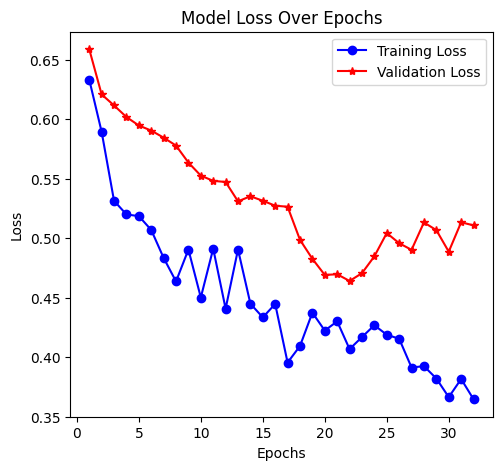

In [20]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

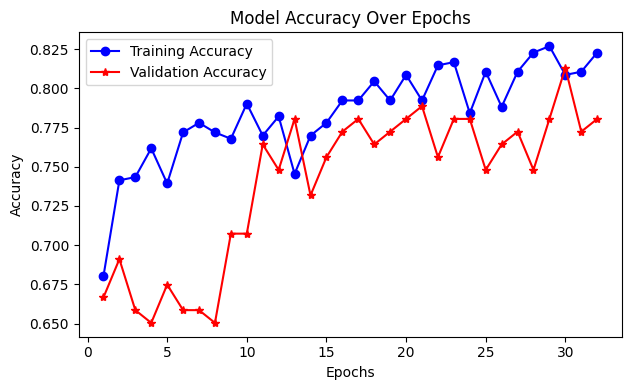

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


{'total_parameters': 158337,
 'FLOPs': 667649,
 'GFLOPs': 0.000667649,
 'model_size_bytes': 1968520,
 'model_size_MB': 1.8773269653320312,
 'inference_time_seconds': 0.10287928581237793,
 'accuracy': 0.7337662577629089}